In [5]:
#T0004 Ligand-based screening: compound similarity

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)
HERE = Path(_dh[-1])
DATA = HERE / "data"

,smiles,name,ROMol
0,Cc1c2c(nn1C)CSCc1cc(n(C)n1)CSc1cc(c3ccccc3c1)O...,AZD5991,
1,CO[C@H]1/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)...,TAPOTOCLAX,
2,CO[C@]1(CN2CCN3CCCC[C@@H]3C2)/C=C/C[C@H](C)[C@...,MURIZATOCLAX,

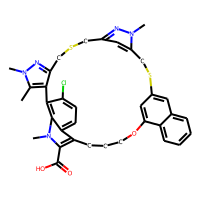
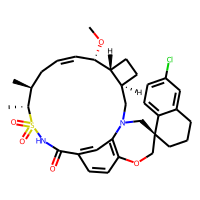
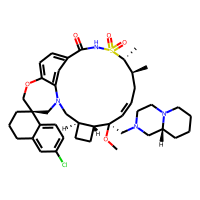

In [3]:
#First, we define and draw three example molecules, which we will encode and compare later on
#The molecules in SMILES format are converted to rdkit molecule objects and visualized with the Draw module in rdkit
#T004 MCL1 direct inhibitor from clinical
#S63845：
#S64315（MIK-665）：
#AZD5991:Cc1c2c(nn1C)CSCc1cc(n(C)n1)CSc1cc(c3ccccc3c1)OCCCc1c(C(=O)O)n(C)c3c-2c(Cl)ccc13
#AMG176(TAPOTOCLAX):CO[C@H]1/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)c2ccc3c(c2)N(C[C@@H]2CC[C@H]21)C[C@@]1(CCCc2cc(Cl)ccc21)CO3
#AMG 397（MURIZATOCLAX）：CO[C@]1(CN2CCN3CCCC[C@@H]3C2)/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)c2ccc3c(c2)N(C[C@@H]2CC[C@H]21)C[C@@]1(CCCc2cc(Cl)ccc21)CO3
#ABBV-467
#PRT1419

# Molecules in SMILES format
molecule_smiles = [
    "Cc1c2c(nn1C)CSCc1cc(n(C)n1)CSc1cc(c3ccccc3c1)OCCCc1c(C(=O)O)n(C)c3c-2c(Cl)ccc13",
    "CO[C@H]1/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)c2ccc3c(c2)N(C[C@@H]2CC[C@H]21)C[C@@]1(CCCc2cc(Cl)ccc21)CO3",
    "CO[C@]1(CN2CCN3CCCC[C@@H]3C2)/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)c2ccc3c(c2)N(C[C@@H]2CC[C@H]21)C[C@@]1(CCCc2cc(Cl)ccc21)CO3",
]

# List of molecule names
molecule_names = [
    "AZD5991",
    "TAPOTOCLAX",
    "MURIZATOCLAX",
]
molecules = pd.DataFrame({"smiles": molecule_smiles, "name": molecule_names})
PandasTools.AddMoleculeColumnToFrame(molecules, smilesCol="smiles")
# Show 3 molecules
molecules.head()

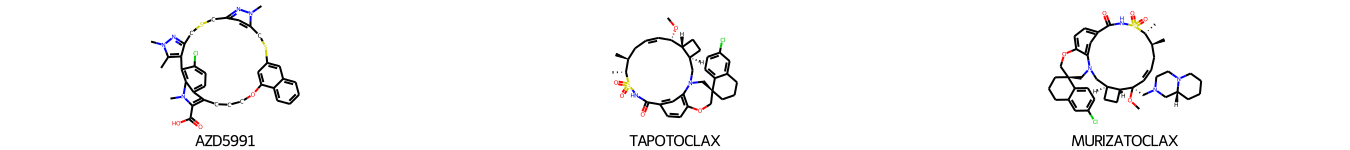

In [4]:
#Visualize all molecules
Draw.MolsToGridImage(
    molecules["ROMol"].to_list(),
    molsPerRow=3,
    subImgSize=(450, 150),
    legends=molecules["name"].to_list(),
)

In [6]:
#Calculate molecular descriptors ：
#Calculate 1D molecular descriptors: Molecular weight

# to all ROMol objects in the DataFrame
molecules["molecule_weight"] = molecules.ROMol.apply(Descriptors.MolWt)
# Sort molecules by molecular weight
molecules.sort_values(["molecule_weight"], ascending=False, inplace=True)
# Show only molecule names and molecular weights
molecules[["smiles", "name", "molecule_weight"]]

,smiles,name,molecule_weight
2,CO[C@]1(CN2CCN3CCCC[C@@H]3C2)/C=C/C[C@H](C)[C@...,MURIZATOCLAX,765.461
0,Cc1c2c(nn1C)CSCc1cc(n(C)n1)CSc1cc(c3ccccc3c1)O...,AZD5991,672.276
1,CO[C@H]1/C=C/C[C@H](C)[C@@H](C)S(=O)(=O)NC(=O)...,TAPOTOCLAX,613.220


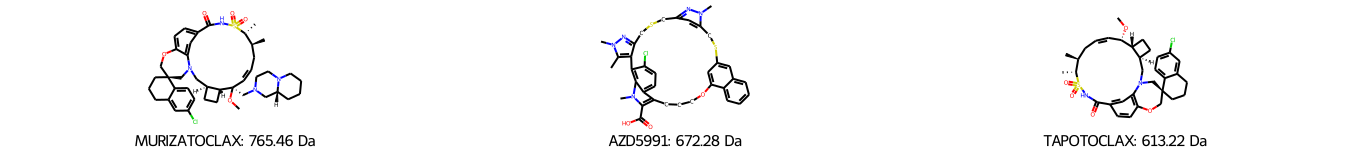

In [8]:
#draw the molecules with their molecular weight
Draw.MolsToGridImage(
    molecules["ROMol"],
    legends=[
        f"{molecule['name']}: {molecule['molecule_weight']:.2f} Da"
        for index, molecule in molecules.iterrows()
    ],
    subImgSize=(450, 150),
)

In [13]:
#In order to account for more detailed properties of a molecule, we now take a look at 2D molecular descriptors
#2D molecular descriptors: MACCS fingerprint
maccs_fp = MACCSkeys.GenMACCSKeys(molecule)
#transform explicit bitvectors to bitstrings
maccs_fp.ToBitString()
#Applied to all molecules
molecules["maccs"] = molecules.ROMol.apply(MACCSkeys.GenMACCSKeys)

In [14]:
#2D molecular descriptors: Morgan fingerprint (The Morgan fingerprint can be calculated either as int or bit vector. By default the radius is 2 and the vector is 2048 long.)
#Generate the Morgan fingerprint as int vector.
circular_int_fp = rdFingerprintGenerator.GetCountFPs([molecule])[0]
circular_int_fp
print(f"Print non-zero elements:\n{circular_int_fp.GetNonzeroElements()}")

Print non-zero elements:
{73: 1, 110: 1, 136: 1, 157: 1, 227: 1, 248: 1, 320: 1, 341: 1, 343: 1, 361: 1, 366: 1, 371: 1, 378: 2, 389: 1, 441: 1, 456: 1, 561: 1, 564: 1, 597: 1, 650: 1, 656: 1, 666: 1, 675: 2, 719: 1, 762: 1, 798: 1, 807: 2, 836: 1, 842: 1, 859: 3, 861: 1, 875: 3, 886: 1, 926: 6, 935: 3, 950: 1, 992: 1, 1028: 1, 1048: 1, 1057: 4, 1087: 1, 1088: 2, 1105: 2, 1145: 3, 1199: 3, 1233: 1, 1271: 1, 1295: 1, 1357: 2, 1380: 15, 1391: 1, 1440: 1, 1443: 1, 1521: 1, 1529: 1, 1534: 1, 1563: 1, 1573: 1, 1586: 1, 1683: 1, 1722: 1, 1733: 1, 1738: 1, 1747: 2, 1750: 4, 1766: 1, 1830: 1, 1855: 1, 1861: 1, 1873: 9, 1887: 1, 1905: 1, 1914: 1, 1917: 1, 1942: 1, 1948: 1, 1950: 1, 1956: 2, 2004: 1, 2024: 1}


In [15]:
#Generate the Morgan fingerprint as bit vector.
circular_bit_fp = rdFingerprintGenerator.GetFPs([molecule])[0]
circular_bit_fp
print(f"Print top 400 fingerprint bits:\n{circular_bit_fp.ToBitString()[:400]}")

Print top 400 fingerprint bits:
0000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000010000000000000000000000000100000000000000000000100000000000000000000000000000000000000000000000000000000000000000000010000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000010100000000000000000100001000010000001000000000010000000000


In [16]:
#Applied to all molecules: Add Morgan fingerprints (as bit vector) for all molecules to the DataFrame.
molecules["morgan"] = rdFingerprintGenerator.GetFPs(molecules["ROMol"].tolist())

In [18]:
#Calculate molecular similarity
#apply two similarity measures, i.e. Tanimoto and Dice, to our two fingerprint types, i.e. MACCS and Morgan fingerprints

# Define molecule query and list
molecule_query = molecules["maccs"][0]
molecule_list = molecules["maccs"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_maccs"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)


preview = molecules.sort_values(["tanimoto_maccs"], ascending=False).reset_index()
preview[["name", "tanimoto_maccs", "dice_maccs"]]


,name,tanimoto_maccs,dice_maccs
0,AZD5991,1.000000,1.000000
1,MURIZATOCLAX,0.561224,0.718954
2,TAPOTOCLAX,0.547368,0.707483


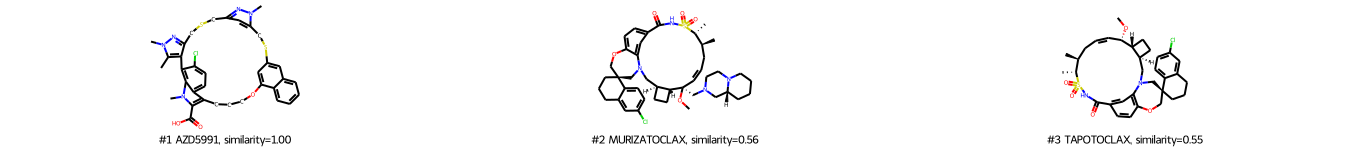

In [19]:
#Draw molecules ranked by the Tanimoto similarity of MACCS fingerprints
def draw_ranked_molecules(molecules, sort_by_column):
    """
    Draw molecules sorted by a given column.

    Parameters
    ----------
    molecules : pandas.DataFrame
        Molecules (with "ROMol" and "name" columns and a column to sort by.
    sort_by_column : str
        Name of the column used to sort the molecules by.

    Returns
    -------
    Draw.MolsToGridImage
        2D visualization of sorted molecules.
    """

    molecules_sorted = molecules.sort_values([sort_by_column], ascending=False).reset_index()
    return Draw.MolsToGridImage(
        molecules_sorted["ROMol"],
        legends=[
            f"#{index+1} {molecule['name']}, similarity={molecule[sort_by_column]:.2f}"
            for index, molecule in molecules_sorted.iterrows()
        ],
        molsPerRow=3,
        subImgSize=(450, 150),
    )
draw_ranked_molecules(molecules, "tanimoto_maccs")

In [20]:
#Add the Tanimoto and Dice similarities between the Morgan fingerprints to the DataFrame.
# Define molecule query and list
molecule_query = molecules["morgan"][0]
molecule_list = molecules["morgan"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_morgan"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)
# Define molecule query and list
molecule_query = molecules["morgan"][0]
molecule_list = molecules["morgan"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_morgan"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)
preview = molecules.sort_values(["tanimoto_morgan"], ascending=False).reset_index()
preview[["name", "tanimoto_morgan", "dice_morgan", "tanimoto_maccs", "dice_maccs"]]

,name,tanimoto_morgan,dice_morgan,tanimoto_maccs,dice_maccs
0,AZD5991,1.000000,1.000000,1.000000,1.000000
1,TAPOTOCLAX,0.126761,0.225000,0.547368,0.707483
2,MURIZATOCLAX,0.112500,0.202247,0.561224,0.718954


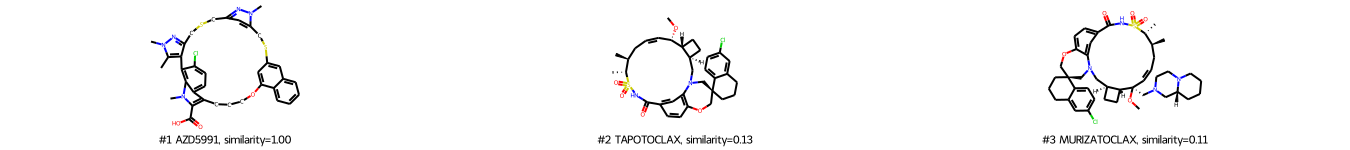

In [21]:
#Draw molecules ranked by the Tanimoto similarities of Morgan fingerprints.
draw_ranked_molecules(molecules, "tanimoto_morgan")


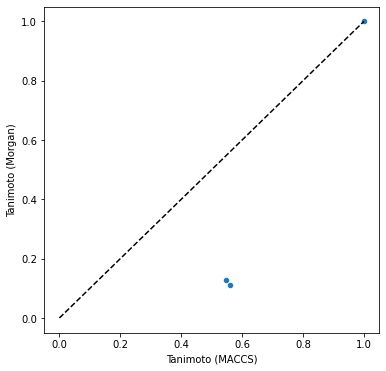

In [22]:
#We compare the Tanimoto similarities based on MACCS and Morgan fingerprints. Therefore, we plot the Tanimoto similarities based on Morgen fingerprints vs. the Tanimoto simlarities based on MACCS fingerprints.
fig, ax = plt.subplots(figsize=(6, 6))
molecules.plot("tanimoto_maccs", "tanimoto_morgan", kind="scatter", ax=ax)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("Tanimoto (MACCS)")
ax.set_ylabel("Tanimoto (Morgan)")
fig;

In [24]:
#Compare query molecule to all molecules in the data set
#Import data from the csv file containing molecules in the SMILES format.
molecule_dataset = pd.read_csv(
    HERE / "../T000_template/data/MCL1_compounds_lipinski.csv",
    usecols=["molecule_chembl_id", "smiles", "pIC50"],
)
print(f"Number of molecules in dataset: {len(molecule_dataset)}")
molecule_dataset.head(5)

Number of molecules in dataset: 416


,molecule_chembl_id,smiles,pIC50
0,CHEMBL4535151,CN(C)C(=O)CO[C@H]1/C=C/CCN(C)C(=O)C[C@](O)(C(=...,9.698970
1,CHEMBL4553660,CN1CC/C=C/[C@H](OCCN2CCOCC2)[C@@H]2CC[C@H]2CN2...,9.698970
2,CHEMBL4464768,CN1CC/C=C/[C@H](OCCNCC(F)(F)CO)[C@@H]2CC[C@H]2...,9.522879
3,CHEMBL4446369,CN1CC/C=C/[C@H](OCCN2CC(F)(F)C2)[C@@H]2CC[C@H]...,9.522879
4,CHEMBL4539543,COC1CN(CCO[C@H]2/C=C/CCN(C)C(=O)C[C@](O)(C(=O)...,9.522879


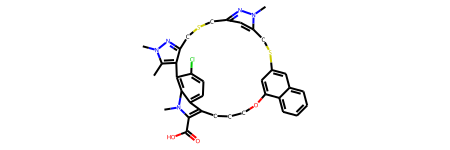

In [26]:
#Query: For the query molecule Gefitinib, generate the ROMol object from the query molecule's SMILES.
query = Chem.MolFromSmiles("Cc1c2c(nn1C)CSCc1cc(n(C)n1)CSc1cc(c3ccccc3c1)OCCCc1c(C(=O)O)n(C)c3c-2c(Cl)ccc13")
query

In [27]:
#Generate MACCS and Morgan fingerprints for the query molecule.
maccs_fp_query = MACCSkeys.GenMACCSKeys(query)
circular_fp_query = rdFingerprintGenerator.GetCountFPs([query])[0]

In [28]:
#Generate MACCS and Morgan fingerprints for all molecules in our dataset.
PandasTools.AddMoleculeColumnToFrame(molecule_dataset, "smiles")
circular_fp_list = rdFingerprintGenerator.GetCountFPs(molecule_dataset["ROMol"].tolist())
maccs_fp_list = molecule_dataset["ROMol"].apply(MACCSkeys.GenMACCSKeys).tolist()

In [29]:
#Calculate the Tanimoto similarity between the query molecule (AZD5991) and all molecules our dataset (using MACCS and Morgan fingerprints).
molecule_dataset["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(
    maccs_fp_query, maccs_fp_list
)
molecule_dataset["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(
    circular_fp_query, circular_fp_list
)

In [30]:
#Calculate Dice similarity for query molecule (AZD5991) and all molecules in file (MACCS, Morgan)
molecule_dataset["dice_maccs"] = DataStructs.BulkDiceSimilarity(maccs_fp_query, maccs_fp_list)
molecule_dataset["dice_morgan"] = DataStructs.BulkDiceSimilarity(
    circular_fp_query, circular_fp_list
)

In [31]:
# NBVAL_CHECK_OUTPUT
molecule_dataset[
    ["smiles", "tanimoto_maccs", "tanimoto_morgan", "dice_maccs", "dice_morgan"]
].head(5)

,smiles,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,CN(C)C(=O)CO[C@H]1/C=C/CCN(C)C(=O)C[C@](O)(C(=...,0.524752,0.211207,0.688312,0.348754
1,CN1CC/C=C/[C@H](OCCN2CCOCC2)[C@@H]2CC[C@H]2CN2...,0.519608,0.203320,0.683871,0.337931
2,CN1CC/C=C/[C@H](OCCNCC(F)(F)CO)[C@@H]2CC[C@H]2...,0.509615,0.193416,0.675159,0.324138
3,CN1CC/C=C/[C@H](OCCN2CC(F)(F)C2)[C@@H]2CC[C@H]...,0.514563,0.205882,0.679487,0.341463
4,COC1CN(CCO[C@H]2/C=C/CCN(C)C(=O)C[C@](O)(C(=O)...,0.519608,0.210084,0.683871,0.347222


,molecule_chembl_id,smiles,pIC50,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,CHEMBL4535151,CN(C)C(=O)CO[C@H]1/C=C/CCN(C)C(=O)C[C@](O)(C(=...,9.698970,,0.524752,0.211207,0.688312,0.348754
1,CHEMBL4553660,CN1CC/C=C/[C@H](OCCN2CCOCC2)[C@@H]2CC[C@H]2CN2...,9.698970,,0.519608,0.203320,0.683871,0.337931
2,CHEMBL4464768,CN1CC/C=C/[C@H](OCCNCC(F)(F)CO)[C@@H]2CC[C@H]2...,9.522879,,0.509615,0.193416,0.675159,0.324138

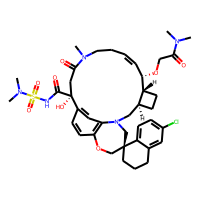
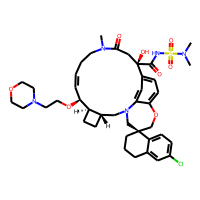
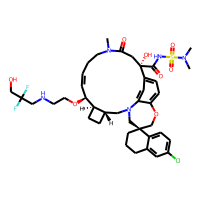

In [32]:
# Show all columns
molecule_dataset.head(3)

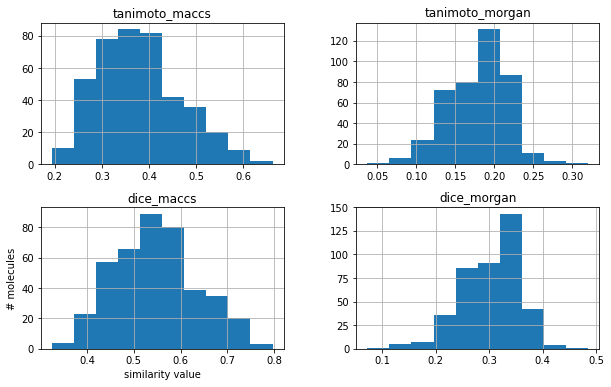

In [33]:
#Distribution of similarity values
#First, we can plot distribution of Tanimoto similarity of MACCS fingerprints.
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
molecule_dataset.hist(["tanimoto_maccs"], ax=axes[0, 0])
molecule_dataset.hist(["tanimoto_morgan"], ax=axes[0, 1])
molecule_dataset.hist(["dice_maccs"], ax=axes[1, 0])
molecule_dataset.hist(["dice_morgan"], ax=axes[1, 1])
axes[1, 0].set_xlabel("similarity value")
axes[1, 0].set_ylabel("# molecules")
fig;

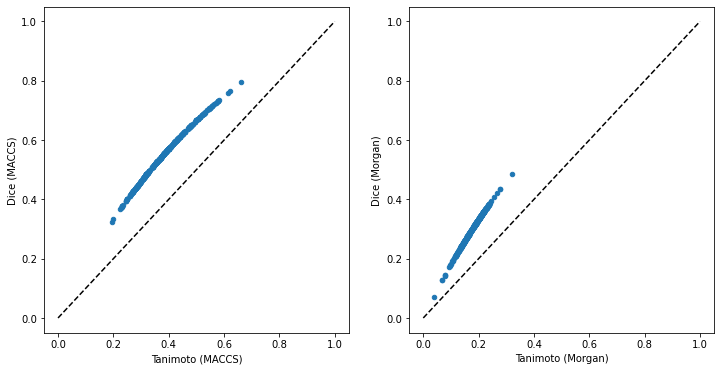

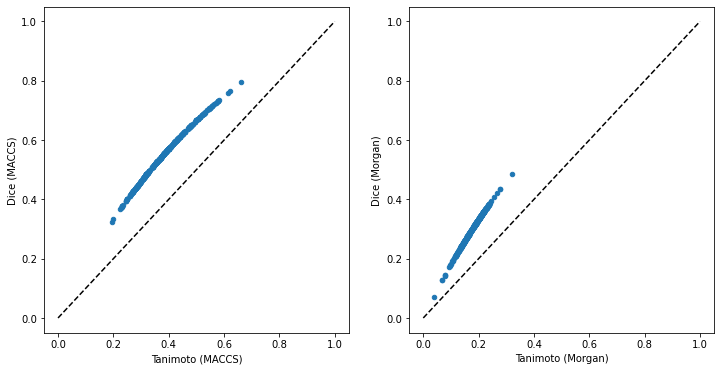

In [36]:
#directly compare Tanimoto and Dice similarities for the two fingerprints
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

molecule_dataset.plot("tanimoto_maccs", "dice_maccs", kind="scatter", ax=axes[0])
axes[0].plot([0, 1], [0, 1], "k--")
axes[0].set_xlabel("Tanimoto (MACCS)")
axes[0].set_ylabel("Dice (MACCS)")

molecule_dataset.plot("tanimoto_morgan", "dice_morgan", kind="scatter", ax=axes[1])
axes[1].plot([0, 1], [0, 1], "k--")
axes[1].set_xlabel("Tanimoto (Morgan)")
axes[1].set_ylabel("Dice (Morgan)")

fig

,molecule_chembl_id,smiles,pIC50,ROMol,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
18,CHEMBL4169687,Cc1c(-c2cccc3c(CCCOc4cccc5ccccc45)c(C(=O)O)n(C...,8.376751,,0.662338,0.320000,0.796875,0.484848
17,CHEMBL4166520,Cc1c(-c2cccc3c(CCCOc4cccc5ccccc45)c(C(=O)O)[nH...,8.468521,,0.612500,0.278049,0.759690,0.435115
300,CHEMBL1377223,COc1ccc(NC(=O)c2c3c(nc4ccccc24)CCC3)cc1S(=O)(=...,4.875789,,0.521739,0.276836,0.685714,0.433628

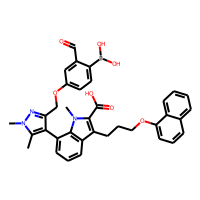
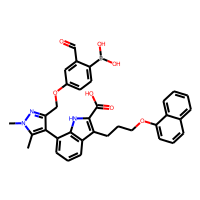
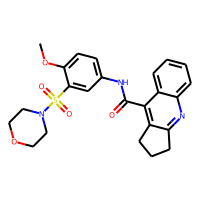

In [37]:
#Visualize most similar molecules(by the Tanimoto similarity based on Morgan fingerprints)
molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).head(3)


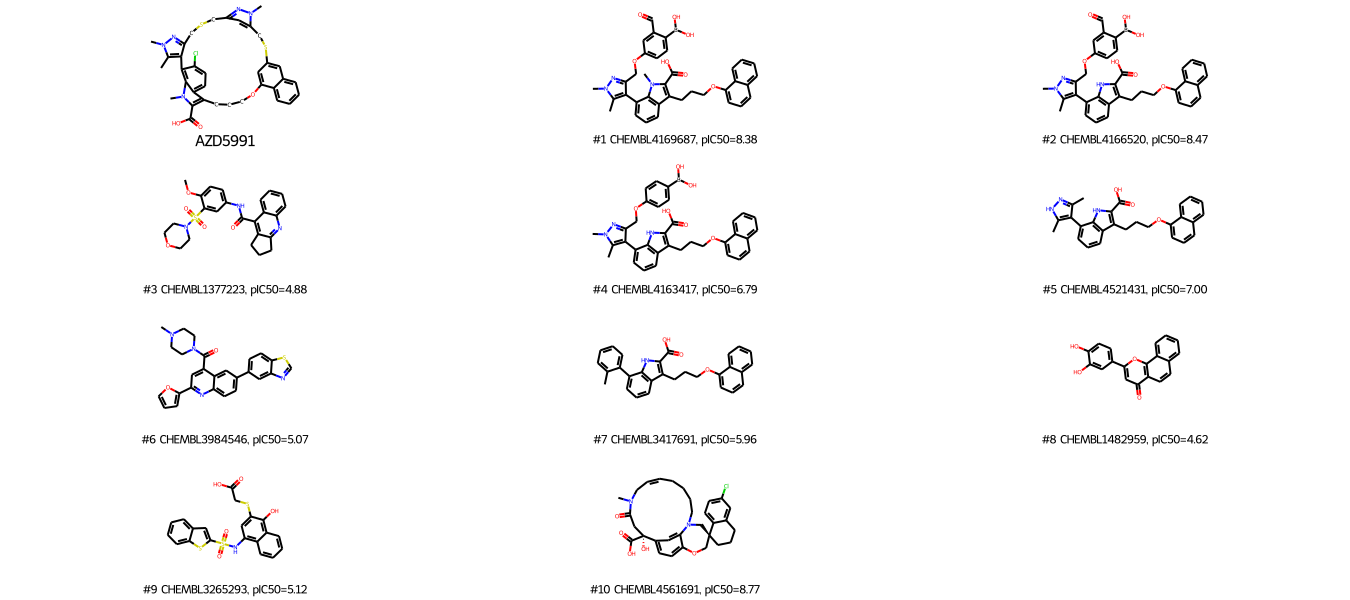

In [39]:
#Show the query and its most similar molecules alongside the molecules' bioactivities.
top_n_molecules = 10
top_molecules = molecule_dataset.sort_values(["tanimoto_morgan"], ascending=False).reset_index()
top_molecules = top_molecules[:top_n_molecules]
legends = [
    f"#{index+1} {molecule['molecule_chembl_id']}, pIC50={molecule['pIC50']:.2f}"
    for index, molecule in top_molecules.iterrows()
]
Chem.Draw.MolsToGridImage(
    mols=[query] + top_molecules["ROMol"].tolist(),
    legends=(["AZD5991"] + legends),
    molsPerRow=3,
    subImgSize=(450, 150),
)

In [ ]:
#In order to validate our virtual screening and see the ratio of detected active molecules, we generate an enrichment plot

In [40]:
#In order to decide whether we treat a molecule as active or inactive, we apply the commonly used pIC50 cutoff value of 6.3. Although there are several suggestions ranging from an pIC50 cutoff values of 5 to 7 in the literature or even to define an exclusion range,
def get_enrichment_data(molecules, similarity_measure, pic50_cutoff):
    """
    Calculates x and y values for enrichment plot:
        x - % ranked dataset
        y - % true actives identified

    Parameters
    ----------
    molecules : pandas.DataFrame
        Molecules with similarity values to a query molecule.
    similarity_measure : str
        Column name which will be used to sort the DataFrame．
    pic50_cutoff : float
        pIC50 cutoff value used to discriminate active and inactive molecules.

    Returns
    -------
    pandas.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of identified true actives.
    """

    # Get number of molecules in data set
    molecules_all = len(molecules)

    # Get number of active molecules in data set
    actives_all = sum(molecules["pIC50"] >= pic50_cutoff)

    # Initialize a list that will hold the counter for actives and molecules while iterating through our dataset
    actives_counter_list = []

    # Initialize counter for actives
    actives_counter = 0

    # Note: Data must be ranked for enrichment plots:
    # Sort molecules by selected similarity measure
    molecules.sort_values([similarity_measure], ascending=False, inplace=True)

    # Iterate over the ranked dataset and check each molecule if active (by checking bioactivity)
    for value in molecules["pIC50"]:
        if value >= pic50_cutoff:
            actives_counter += 1
        actives_counter_list.append(actives_counter)

    # Transform number of molecules into % ranked dataset
    molecules_percentage_list = [i / molecules_all for i in range(1, molecules_all + 1)]

    # Transform number of actives into % true actives identified
    actives_percentage_list = [i / actives_all for i in actives_counter_list]

    # Generate DataFrame with x and y values as well as label
    enrichment = pd.DataFrame(
        {
            "% ranked dataset": molecules_percentage_list,
            "% true actives identified": actives_percentage_list,
        }
    )

    return enrichment

In [41]:
#Set the pIC50 cutoff used to discriminate active and inactive molecules...
pic50_cutoff = 6.3

In [43]:
#get the enrichment for MACCS and Morgan fingerprints (using the Tanimoto similarity).
similarity_measures = ["tanimoto_maccs", "tanimoto_morgan"]
enrichment_data = {
    similarity_measure: get_enrichment_data(molecule_dataset, similarity_measure, pic50_cutoff)
    for similarity_measure in similarity_measures
}
enrichment_data["tanimoto_maccs"].head()

,% ranked dataset,% true actives identified
0,0.002404,0.011905
1,0.004808,0.023810
2,0.007212,0.035714
3,0.009615,0.035714
4,0.012019,0.047619


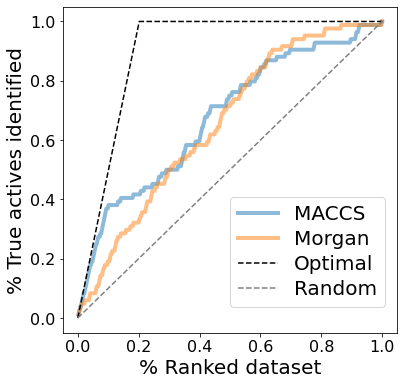

In [44]:
#Plot the enrichment data next to the optimal and random enrichment curve!
fig, ax = plt.subplots(figsize=(6, 6))

fontsize = 20

# Plot enrichment data
for similarity_measure, enrichment in enrichment_data.items():
    ax = enrichment.plot(
        ax=ax,
        x="% ranked dataset",
        y="% true actives identified",
        label=similarity_measure,
        alpha=0.5,
        linewidth=4,
    )
ax.set_ylabel("% True actives identified", size=fontsize)
ax.set_xlabel("% Ranked dataset", size=fontsize)

# Plot optimal curve: Ratio of actives in dataset
ratio_actives = sum(molecule_dataset["pIC50"] >= pic50_cutoff) / len(molecule_dataset)
ax.plot(
    [0, ratio_actives, 1],
    [0, 1, 1],
    label="Optimal curve",
    color="black",
    linestyle="--",
)

# Plot random curve
ax.plot([0, 1], [0, 1], label="Random curve", color="grey", linestyle="--")

plt.tick_params(labelsize=16)
plt.legend(
    labels=["MACCS", "Morgan", "Optimal", "Random"],
    loc=(0.5, 0.08),
    fontsize=fontsize,
    labelspacing=0.3,
)

# Save plot -- use bbox_inches to include text boxes
plt.savefig(
    DATA / "enrichment_plot.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

plt.show()

In [45]:
#Calculate enrichment factors(The (experimental) enrichment factor (EF) is used to access a methods success by a single number rather than a plot. 
#The idea is to determine the percentage of active molecules in the top x% (e.g. 5%) of ranked molecules, as defined by the following helper function.)
def calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff):
    """
    Get the experimental enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    enrichment : pd.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of
        identified true actives.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Experimental enrichment factor.
    """

    # Keep only molecules that meet the cutoff
    enrichment = enrichment[
        enrichment["% ranked dataset"] <= ranked_dataset_percentage_cutoff / 100
    ]
    # Get highest percentage of actives and the corresponding percentage of actives
    highest_enrichment = enrichment.iloc[-1]
    enrichment_factor = round(100 * float(highest_enrichment["% true actives identified"]), 1)
    return enrichment_factor

In [46]:
#This helper function calculates the random enrichment of active molecules in the top x% of ranked molecules (random enrichment factor).
def calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff):
    """
    Get the random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Random enrichment factor.
    """

    enrichment_factor_random = round(float(ranked_dataset_percentage_cutoff), 1)
    return enrichment_factor_random

In [47]:
#And this helper function calculates the optimal enrichment of active molecules in the top x% of ranked molecules (optimal enrichment factor).
def calculate_enrichment_factor_optimal(molecules, ranked_dataset_percentage_cutoff, pic50_cutoff):
    """
    Get the optimal random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    molecules : pandas.DataFrame
        the DataFrame with all the molecules and pIC50.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.
    activity_cutoff: float
        pIC50 cutoff value used to discriminate active and inactive molecules

    Returns
    -------
    float
        Optimal enrichment factor.
    """

    ratio = sum(molecules["pIC50"] >= pic50_cutoff) / len(molecules) * 100
    if ranked_dataset_percentage_cutoff <= ratio:
        enrichment_factor_optimal = round(100 / ratio * ranked_dataset_percentage_cutoff, 1)
    else:
        enrichment_factor_optimal = 100.0
    return enrichment_factor_optimal

In [48]:
#calculate the experimental enrichment factor (EF) for 5% of ranked dataset
ranked_dataset_percentage_cutoff = 5
for similarity_measure, enrichment in enrichment_data.items():
    enrichment_factor = calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff)
    print(
        f"Experimental EF for {ranked_dataset_percentage_cutoff}% of ranked dataset ({similarity_measure}): {enrichment_factor}%"
    )

Experimental EF for 5% of ranked dataset (tanimoto_maccs): 19.0%
Experimental EF for 5% of ranked dataset (tanimoto_morgan): 8.3%


In [49]:
#we can compare it to the random and optimal enrichment factor.
enrichment_factor_random = calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff)
print(
    f"Random EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_random}%"
)
enrichment_factor_optimal = calculate_enrichment_factor_optimal(
    molecule_dataset, ranked_dataset_percentage_cutoff, pic50_cutoff
)
print(
    f"Optimal EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_optimal}%"
)

Random EF for 5% of ranked dataset: 5.0%
Optimal EF for 5% of ranked dataset: 24.8%
